In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn 

In [2]:
data=pd.read_csv("bankfull.csv",sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data1=pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'],drop_first=True)

In [4]:
data1.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
data1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [6]:
#Selecting columns
columns=['age','balance','duration','campaign']
data1=data1[columns]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


<AxesSubplot:xlabel='age'>

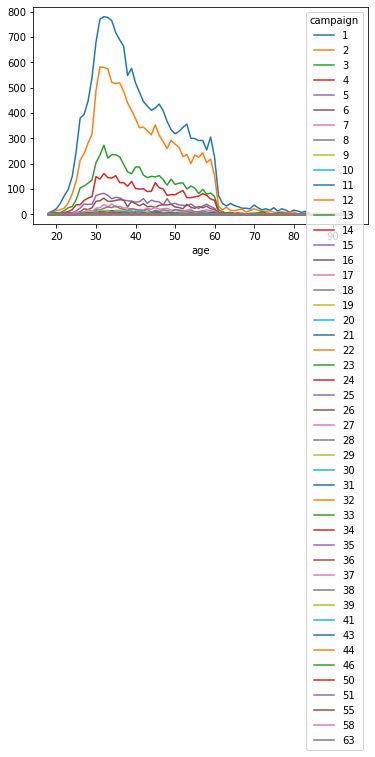

In [7]:
pd.crosstab(data.age,data1.campaign).plot(kind="line")

## Graph shows that age group 20-60 has more rejection of application while 60-90 almost everybody

<AxesSubplot:>

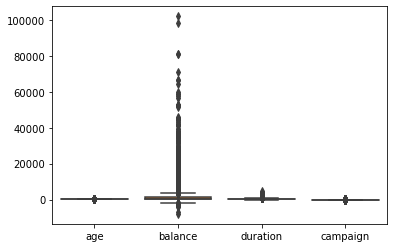

In [8]:
sn.boxplot(data=data1,orient="v")

In [9]:
data1.rename(columns={'y': 'client'}, inplace=True)

In [11]:
data1['outcome']=data.y.map({'no':0,'yes':1})
data1.tail(10)

,age,balance,duration,campaign,outcome
45201,53,583,226,1,1
45202,34,557,224,1,1
45203,23,113,266,1,1
45204,73,2850,300,1,1
45205,25,505,386,2,1
45206,51,825,977,3,1
45207,71,1729,456,2,1
45208,72,5715,1127,5,1
45209,57,668,508,4,0
45210,37,2971,361,2,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

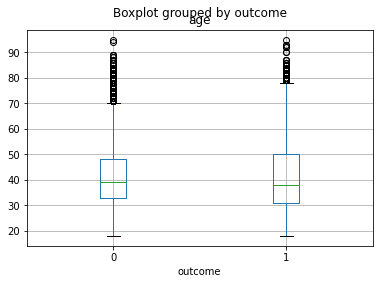

In [12]:
data1.boxplot(column='age',by='outcome')

### Probably not a great feature since lot of outliers

In [13]:
data2=['age','balance','duration','campaign']
output=['outcome']
X=data1[data2]
Y=data1[output]

In [14]:
classifier=LogisticRegression()

In [15]:
classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [16]:
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                  intercept_scaling=1,l1_ratio=None,max_iter=100,
                  multi_class='auto',n_jobs=None,penalty='l2',
                  random_state=None,solver='lbfgs',tol=0.0001,verbose=0,
                  warm_start=False)

LogisticRegression()

In [17]:
classifier.coef_

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [18]:
classifier.predict_proba(X)

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [19]:
y_pred=classifier.predict(X)

In [20]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix=confusion_matrix(Y,y_pred)

In [23]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [24]:
import matplotlib.pyplot as plt

Text(0.5, 15.0, 'Predicted Label')

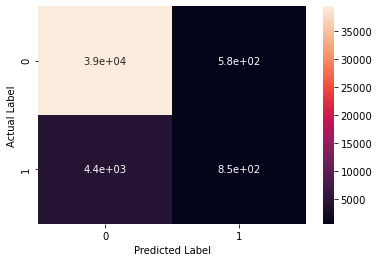

In [25]:
sn.heatmap(confusion_matrix,annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [28]:
model.fit(x_train,y_train)

NameError: name 'model' is not defined